# LDA Performance Testing

## LDA with $p = 1$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math

from sklearn.model_selection import train_test_split

In [2]:
df = pd.DataFrame(columns=["X" , "Y" , "Class"])

K = 2
N = 150

means = [0 , 0.5]
std = 0.1
pi = []
n = [50 , 100]

for k in range(K):
    X = np.random.normal(loc = means[k] , scale = std , size = n[k])
    pi.append(n[k] / N)
    for i in range(n[k]):
        df.loc[len(df)] = [X[i] , 0 , k]

<Axes: xlabel='X', ylabel='Y'>

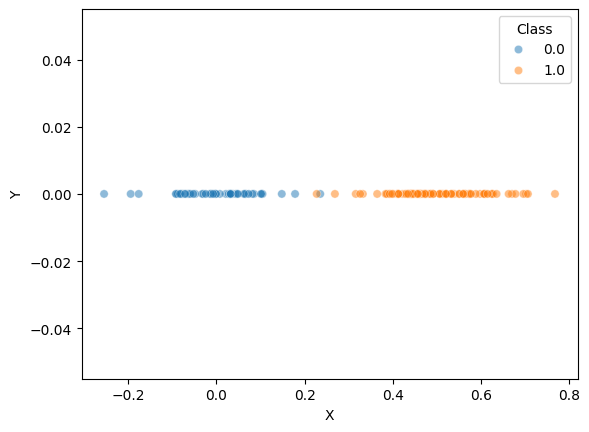

In [3]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class' , alpha = 0.5)

In [4]:
X = df['X']
y = df['Class']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.4 , random_state = 42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [5]:
df_train = pd.DataFrame(columns=['X', 'Y' , 'Class'])

for i in range(len(X_train)):
    df_train.loc[len(df_train)] = [X_train[i] , 0 , y_train[i]]

df_train

,X,Y,Class
0,0.467164,0.0,1.0
1,0.085074,0.0,0.0
2,-0.255088,0.0,0.0
3,-0.032199,0.0,0.0
4,0.609519,0.0,1.0
...,...,...,...
85,0.627721,0.0,1.0
86,0.448096,0.0,1.0
87,0.148231,0.0,0.0
88,0.437807,0.0,1.0


<Axes: xlabel='X', ylabel='Y'>

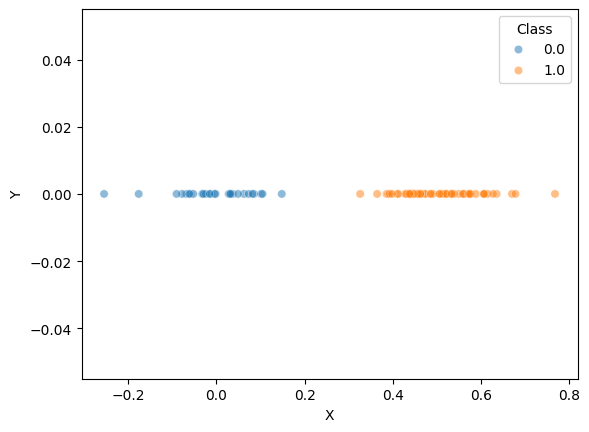

In [6]:
sns.scatterplot(data=df_train , x ='X' , y = 'Y' , hue = 'Class' , alpha = 0.5)

In [7]:
means = [0 , 0]
pi = [0 , 0]
N = len(X_train)
std = 0.1

for k in range(2):
    for i in range(N):
        if(y_train[i] != k):
            continue

        means[k] += X_train[i]
        pi[k] += 1

    means[k] /= N
    pi[k] /= N

print(means[0] , means[1])
print(pi[0] , pi[1])

-0.0014457018833210588 0.3505549465517775
0.3 0.7


In [8]:
EPS = 0.00001

def discriminant(x):
    result_class = -1
    result_evaluation = 0
    for k in range(K):
        evaluation = 0

        evaluation += x * means[k] / sigma ** 2
        evaluation -= means[k] ** 2 / (2 * sigma ** 2)
        evaluation += math.log(pi[k])

        if result_class == -1 or evaluation > result_evaluation:
            result_evaluation = evaluation
            result_class = k

        # print(f"Class {k} has the evaluation of {evaluation}")

    # print(f"Best class fits for x = {x} is class {result_class} with the maximum evaluation of {result_evaluation} amongst all")
    return result_class

In [9]:
y_pred = []

for i in range(len(X_train)):
    y_pred.append(discriminant(X_train[i]))

NameError: name 'sigma' is not defined

In [ ]:
from sklearn.metrics import zero_one_loss, log_loss

logLoss = log_loss(y_train , y_pred)
zeroOneLoss = zero_one_loss(y_train , y_pred)

print(logLoss , zeroOneLoss)

2.220446049250313e-16 0.0


In [ ]:
y_pred = []

for i in range(len(X_test)):
    y_pred.append(discriminant(X_test[i]))

In [ ]:
logLoss = log_loss(y_test , y_pred)
zeroOneLoss = zero_one_loss(y_test , y_pred)

print(logLoss , zeroOneLoss)

2.220446049250313e-16 0.0


In [ ]:
df = pd.DataFrame(columns=["X" , "Y" , "Class"])

K = 2
N = 10000

means = [0 , 0.5]
std = 0.1
pi = []
n = [2827 , 10000 - 2827]

for k in range(K):
    X = np.random.normal(loc = means[k] , scale = std , size = n[k])
    pi.append(n[k] / N)
    for i in range(n[k]):
        df.loc[len(df)] = [X[i] , 0 , k]

<Axes: xlabel='X', ylabel='Y'>

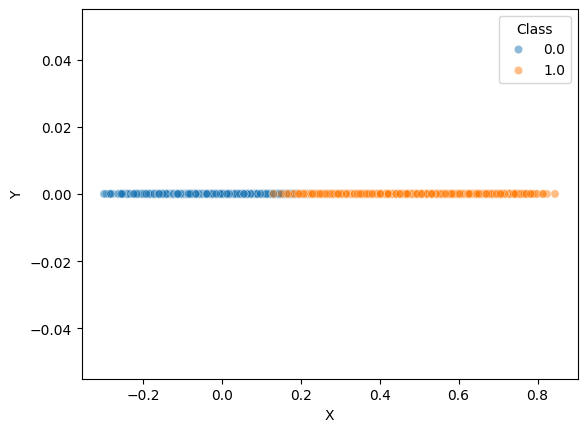

In [ ]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class' , alpha = 0.5)

In [ ]:
X = df['X']
y = df['Class']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.4 , random_state = 42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
means = [0 , 0]
pi = [0 , 0]
N = len(X_train)
std = 0.1

for k in range(2):
    for i in range(N):
        if(y_train[i] != k):
            continue

        means[k] += X_train[i]
        pi[k] += 1

    means[k] /= N
    pi[k] /= N

print(means[0] , means[1])
print(pi[0] , pi[1])

0.001196855212564782 0.35867238016814956
0.2803333333333333 0.7196666666666667


In [ ]:
EPS = 0.00001

def discriminant(x):
    result_class = -1
    result_evaluation = 0
    for k in range(K):
        evaluation = 0

        evaluation += x * means[k] / sigma ** 2
        evaluation -= means[k] ** 2 / (2 * sigma ** 2)
        evaluation += math.log(pi[k])

        if result_class == -1 or evaluation > result_evaluation:
            result_evaluation = evaluation
            result_class = k

        # print(f"Class {k} has the evaluation of {evaluation}")

    # print(f"Best class fits for x = {x} is class {result_class} with the maximum evaluation of {result_evaluation} amongst all")
    return result_class

In [ ]:
y_pred = []

for i in range(len(X_train)):
    y_pred.append(discriminant(X_train[i]))

In [ ]:
logLoss = log_loss(y_train , y_pred)
zeroOneLoss = zero_one_loss(y_train , y_pred)

print(logLoss , zeroOneLoss)

0.6187493831798447 0.017166666666666663


In [ ]:
y_pred = []

for i in range(len(X_test)):
    y_pred.append(discriminant(X_test[i]))

In [ ]:
logLoss = log_loss(y_test , y_pred)
zeroOneLoss = zero_one_loss(y_test , y_pred)

print(logLoss , zeroOneLoss)

0.6217530209622709 0.017249999999999988


## Performance Testing with $K > 2$

In [11]:
df = pd.DataFrame(columns=["X" , "Y" , "Class"])

K = 3
N = 300

means = [0 , 0.5 , -1]
std = 0.1
pi = []
n = [50 , 100 , 150]

for k in range(K):
    X = np.random.normal(loc = means[k] , scale = std , size = n[k])
    pi.append(n[k] / N)
    for i in range(n[k]):
        df.loc[len(df)] = [X[i] , 0 , k]

<Axes: xlabel='X', ylabel='Y'>

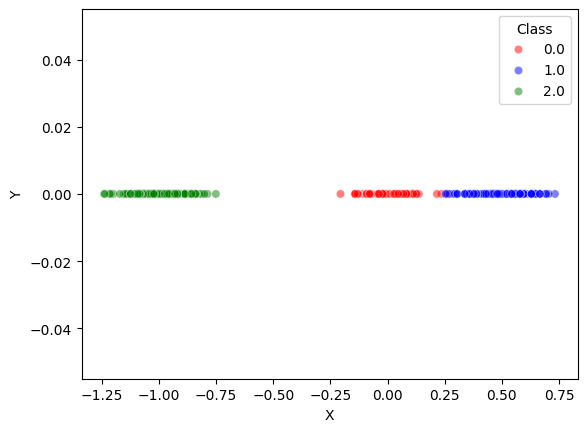

In [13]:
color_palette = {0: 'red' , 1:'blue' , 2:'green'}
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class' , alpha = 0.5, palette=color_palette)